https://mp.weixin.qq.com/s/rfFaN57hRQ5-L3wo-5jcVg
### 目标
学习将不同的几何变换应用到图像上，如平移、旋转、仿射变换等。  
你会看到这些函数: cv.getPerspectiveTransform  
### 变换
OpenCV提供了两个转换函数cv.warpAffine和cv.warpPerspective，您可以使用它们进行各种转换。cv.warpAffine采用2x3转换矩阵，而cv.warpPerspective采用3x3转换矩阵作为输入。  
### 缩放
缩放只是调整图像的大小。为此，OpenCV带有一个函数cv.resize()。图像的大小可以手动指定，也可以指定缩放比例。也可使用不同的插值方法。首通常的，缩小使用cv.INTER_AREA，放缩使用cv.INTER_CUBIC(较慢)和cv.INTER_LINEAR(较快效果也不错)。默认情况下，所有的放缩都使用cv.INTER_LINEAR。您可以使用以下方法调整输入图像的大小：  

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

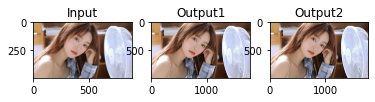

In [2]:
img = cv.imread('D:/CodeField/github/Python_cv/pic/01.jpg')
res1 = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_LINEAR)
'''
cv.INTER_NEAREST	最近邻插值
cv.INTER_LINEAR	双线性插值
cv.INTER_CUBIC	三次样条插值
cv.INTER_AREA	使用像素区域关系重新采样。它可能是图像抽取的首选方法，因为它可以提供无莫尔条纹的结果。但是当图像被缩放时，它类似于INTER_NEAREST方法。
'''
#或者
height, width = img.shape[:2]
res2 = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
res1 = cv.cvtColor(res1,cv.COLOR_BGR2RGB)
res2 = cv.cvtColor(res2,cv.COLOR_BGR2RGB)
#matplotlib的颜色通道是RGB，opencv是BGR
plt.subplot(131),plt.imshow(img),plt.title('Input')
plt.subplot(132),plt.imshow(res1),plt.title('Output1')
plt.subplot(133),plt.imshow(res2),plt.title('Output2')
plt.show()

### 平移
平移是物体位置的移动。如果您知道在(x,y)方向上的位移，则将其设为图片，你可以创建转换矩阵M，如下所示：  
M=  
[  
1 0 t_x;  
0 1 t_y  
]  
您可以将其放入np.float32类型的Numpy数组中，并将其传递给cv.warpAffine函数。参见下面偏移为(100, 50)的示例：

"\ncv.imshow('img',dst)\ncv.waitKey(0)\ncv.destroyAllWindows()\n"

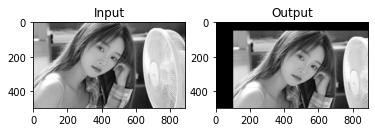

In [8]:
img = cv.imread('D:/CodeField/github/Python_cv/pic/01.jpg',0)
rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))
'''
cv2.warpAffine(src, M, dsize, dst=None, flags=None, borderMode=None, borderValue=None) --> dst
src:输入图像
M:2*3的变换矩阵
dsize:变换后输出图像尺寸     
dst:输出图像
flag:插值方法
borderMode:边界像素外扩方式
borderValue:边界像素插值,默认用0填充
'''
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
dst = cv.cvtColor(dst,cv.COLOR_BGR2RGB)
#matplotlib的颜色通道是RGB，opencv是BGR

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')

'''
cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()
'''

警告：cv.warpAffine函数的第三个参数是输出图像的大小，其形式应为(width，height)。记住width =列数，height =行数。

### 旋转
图像旋转角度为θ是通过以下形式的变换矩阵实现的：  
M=[
cos(θ)，-sin(θ);  
sin(θ),cos(θ)  
]  
但是OpenCV提供了可缩放的旋转以及可调整的旋转中心，因此您可以在自己喜欢的任何位置旋转。修改后的变换矩阵为：  
[  
α β （1-α）*center.x-β*center.y;  
-β α β*center.x+（1-α）*center.y  
]  
其中：  
α=scale*cos(θ)  
β=scale*sin(θ)  
为了找到此转换矩阵，OpenCV提供了一个函数cv.getRotationMatrix2D。请检查以下示例，该示例将图像相对于中心旋转90度而没有任何缩放比例。

(<AxesSubplot:title={'center':'Output2'}>,
 Text(0.5, 1.0, 'Output2'))

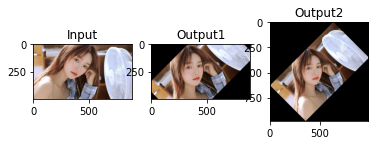

In [24]:
#此例子不能够在彩色下应用，把0删除或者变成1都会出现错误。
img = cv.imread('D:/CodeField/github/Python_cv/pic/01.jpg',1)
rows,cols,ch = img.shape     #彩色下rows,cols,ch = img.shape多一个ch的值错误就没了
# cols-1 和 rows-1 是坐标限制
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),45,1)
# 第一个参数旋转中心，第二个参数旋转角度，第三个参数：缩放比例
dst = cv.warpAffine(img,M,(cols,rows))

# 自适应图片边框大小
cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])
new_w = rows * sin + cols * cos
new_h = rows * cos + cols * sin
M[0, 2] += (new_w - cols) * 0.5
M[1, 2] += (new_h - rows) * 0.5
w = int(np.round(new_w))
h = int(np.round(new_h))
res = cv.warpAffine(img, M, (w, h))

img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
dst = cv.cvtColor(dst,cv.COLOR_BGR2RGB)
res = cv.cvtColor(res,cv.COLOR_BGR2RGB)


plt.subplot(131),plt.imshow(img),plt.title('Input')
plt.subplot(132),plt.imshow(dst),plt.title('Output1')
plt.subplot(133),plt.imshow(res),plt.title('Output2')

### 仿射变换
在仿射变换中，原始图像中的所有平行线在输出图像中仍将平行。为了找到变换矩阵，我们需要输入图像中的三个点及其在输出图像中的对应位置。然后cv.getAffineTransform将创建一个2x3矩阵，该矩阵将传递给cv.warpAffine。  
查看以下示例，并查看我选择的点（以绿色标记）：

(<AxesSubplot:title={'center':'Output2'}>,
 Text(0.5, 1.0, 'Output2'))

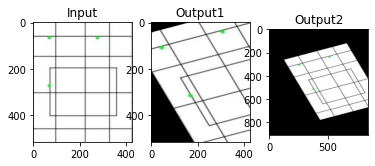

In [29]:
img = cv.imread('D:/CodeField/github/Python_cv/pic/drawing.png')
rows,cols,ch = img.shape
#pts1标定初始点，pts2标定变换后点的位置
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
#得到变换矩阵
M = cv.getAffineTransform(pts1,pts2)

dst = cv.warpAffine(img,M,(cols,rows))

# 自适应图片边框大小
cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])
new_w = rows * sin + cols * cos
new_h = rows * cos + cols * sin
M[0, 2] += (new_w - cols) * 0.5
M[1, 2] += (new_h - rows) * 0.5
w = int(np.round(new_w))
h = int(np.round(new_h))
res = cv.warpAffine(img, M, (w, h))

plt.subplot(131),plt.imshow(img),plt.title('Input')
plt.subplot(132),plt.imshow(dst),plt.title('Output1')
plt.subplot(133),plt.imshow(res),plt.title('Output2')

### 透视变换
对于透视变换，您需要3x3变换矩阵。即使在转换后，直线也将保持直线。要找到此变换矩阵，您需要在输入图像上有4个点，在输出图像上需要相应的点。在这四个点中，其中三个不应共线。然后可以通过函数cv.getPerspectiveTransform找到变换矩阵。然后将cv.warpPerspective应用于此3x3转换矩阵。  
请参见下面的代码：

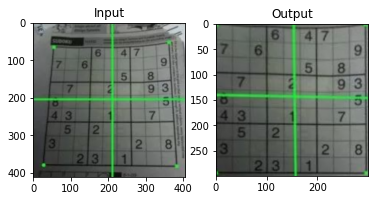

In [30]:
img = cv.imread('D:/CodeField/github/Python_cv/pic/sudoku.png')
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()